In [17]:
from tqdm import tqdm
import pandas as pd
import requests as req 
from bs4 import BeautifulSoup as bs
import re
from kiwipiepy import Kiwi
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt

In [18]:
def preprocess_sentence_kr(w):
  w = w.strip()
  w = re.sub(r"[^0-9가-힣?.!,¿a-zA-Z]+", " ", w) 
  w = w.strip() 
  return w
 

In [21]:
url='https://search.naver.com/search.naver?where=nexearch&sm=tab_etc&mra=bkEw&pkid=68&os=36435246&qvt=0&query=%EC%A3%BC%ED%86%A0%ED%94%BC%EC%95%84%202%20%EB%A6%AC%EB%B7%B0'
print(req.get(url))
new=req.get(url)
chart= bs(new.text,'lxml')
ur=chart.select(".list_title>a")
blog_url=[]
blog_title=[]
blog_content=[]
total=[]
f=open('../../data/movie_review1.txt','w',encoding='utf-8')
for i in tqdm(range(len(ur))):
    tmp_link=ur[i].get('href')
    new=req.get(tmp_link)
    soup1= bs(new.text,'lxml')
    a=soup1.select_one('#mainFrame').get('src')
    tmp='https://blog.naver.com/'+a
    blog_url.append(tmp)
    new=req.get(blog_url[i])
    soup2= bs(new.text,'lxml')
    blog_title.append(soup2.select_one('.se-module.se-module-text.se-title-text>p>span').text)
    blog_content.append(preprocess_sentence_kr(soup2.select('.se-main-container')[0].text))
    total.append([blog_url[i],blog_title[i],blog_content[i]])
    f.write(preprocess_sentence_kr(soup2.select('.se-main-container')[0].text))
f.close()    

<Response [200]>


100%|██████████| 10/10 [00:15<00:00,  1.54s/it]


In [24]:
f=open('../../data/movie_review1.txt','r',encoding='utf-8')
review=f.readline()
f.close()

In [25]:
kiwi=Kiwi()
#토큰화
token=kiwi.tokenize(review)
# 일반 명사만 추출 (NNG)
# token 의 리스트를 돌면서 tag가 NNG 인 form을 nng_list에 답으세요
nng_list=[]
for i in token:
    if(i.tag=='NNG'):
        nng_list.append(i.form)

In [26]:
counter=Counter(nng_list)
top_100=counter.most_common(100)
top_100

[('영화', 88),
 ('동물', 45),
 ('캐릭터', 45),
 ('등장', 42),
 ('애니메이션', 36),
 ('전작', 34),
 ('이번', 32),
 ('개봉', 28),
 ('사건', 27),
 ('파충류', 26),
 ('메시지', 25),
 ('뱀', 22),
 ('이야기', 22),
 ('파트너', 22),
 ('재미', 21),
 ('작품', 21),
 ('장면', 20),
 ('생각', 19),
 ('속편', 19),
 ('쿠키', 17),
 ('상황', 17),
 ('관계', 17),
 ('해결', 17),
 ('차별', 17),
 ('사회', 17),
 ('정도', 16),
 ('편견', 16),
 ('확장', 16),
 ('주제', 16),
 ('관람', 16),
 ('리뷰', 14),
 ('세계', 14),
 ('사랑', 14),
 ('시작', 14),
 ('전편', 14),
 ('과정', 14),
 ('서로', 14),
 ('세계관', 14),
 ('자신', 14),
 ('관객', 14),
 ('도시', 13),
 ('마음', 13),
 ('모험', 13),
 ('전체', 13),
 ('주인공', 13),
 ('존재', 13),
 ('활약', 13),
 ('경찰', 13),
 ('감독', 13),
 ('진실', 12),
 ('다양', 12),
 ('이후', 12),
 ('스틸', 12),
 ('감정', 12),
 ('말', 11),
 ('세상', 11),
 ('기대', 11),
 ('흥행', 11),
 ('콤비', 10),
 ('극장', 10),
 ('부분', 10),
 ('매력', 10),
 ('가', 10),
 ('갈등', 10),
 ('지금', 10),
 ('메인', 10),
 ('토끼', 10),
 ('정보', 10),
 ('때', 10),
 ('컷', 10),
 ('성격', 9),
 ('혐오', 9),
 ('사람', 9),
 ('서사', 9),
 ('여우', 9),
 ('시리즈', 9),
 ('평', 9),
 

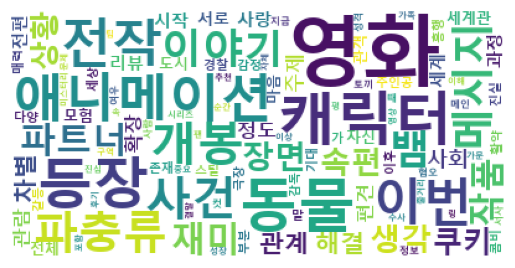

In [27]:
wc = WordCloud(
    font_path='C:/Windows/Fonts/malgunbd.ttf',
    background_color='white'    
).generate_from_frequencies(dict(top_100))
plt.imshow(wc)
plt.axis('off')
plt.show()